# AMERICAN SIGN LANGUAGE - CNN

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. 

Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). 

The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 

The original hand gesture image data represented multiple users repeating the gesture against different backgrounds.

![](https://d.newsweek.com/en/full/1394686/asl-getty-images.jpg)

## IMPORTING LIBRARIES

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf  # Importing the TensorFlow library for deep learning
import pydot  # Importing the pydot library for generating model graphs
import matplotlib.pyplot as plt  # Importing the matplotlib library for visualization

In [2]:
# Importing specific modules from TensorFlow and Keras
from tensorflow.keras.datasets import cifar10  # Importing the CIFAR-10 dataset
from tensorflow.keras.models import Sequential  # Importing the Sequential class for creating models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization  # Importing specific layer types
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing the ImageDataGenerator for image data augmentation
from sklearn.preprocessing import LabelBinarizer  # Importing the LabelBinarizer class for binarizing class labels
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Importing the ReduceLROnPlateau callback for reducing learning rate
from IPython.display import SVG  # Importing the SVG class for displaying SVG images
from tensorflow.keras.utils import model_to_dot  # Importing the model_to_dot function for converting models to graphs
from tensorflow.keras.utils import plot_model  # Importing the plot_model function for plotting models
from tensorflow.keras.preprocessing import image  # Importing the image module for loading and preprocessing images
from matplotlib.pyplot import imshow  # Importing the imshow function for displaying images
from tensorflow.keras.applications.imagenet_utils import preprocess_input  # Importing the preprocess_input function for image preprocessing
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for data splitting

# The imports above provide necessary tools for deep learning model building and training using TensorFlow and Keras.
# Each import statement brings in specific functionalities that will be used in the code later.

## READING DATA

In [3]:
train = pd.read_csv("C:/Users/saisr/Downloads/sign_mnist_train.csv/sign_mnist_train.csv")
test = pd.read_csv("C:/Users/saisr/Downloads/sign_mnist_test.csv/sign_mnist_test.csv")

In [4]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [5]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


### Separating dependent and independent variables

In [6]:
x_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

In [7]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

### Let's see the frequency distribution for each label

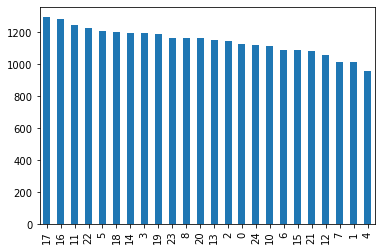

In [9]:
y_train.value_counts().plot.bar()

In [10]:
x_test = test.drop(labels = ["label"],axis = 1) 
y_test = test["label"]

In [11]:
x_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

In [12]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


#### Normalize data set to 0 to 1 range. This helps the optimizer to converge faster as compared to 0-255 range

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0.741176,0.741176,0.745098,0.745098,0.752941,0.756863,0.756863,0.756863,0.756863,0.760784,...,0.517647,0.647059,0.388235,0.301961,0.203922,0.784314,0.917647,0.784314,0.870588,0.882353
27451,0.592157,0.603922,0.615686,0.619608,0.627451,0.631373,0.639216,0.643137,0.650980,0.654902,...,0.776471,0.776471,0.776471,0.776471,0.776471,0.768627,0.764706,0.764706,0.764706,0.760784
27452,0.682353,0.682353,0.682353,0.682353,0.682353,0.686275,0.686275,0.682353,0.678431,0.678431,...,0.474510,0.768627,0.819608,0.815686,0.807843,0.800000,0.796078,0.792157,0.784314,0.784314
27453,0.694118,0.709804,0.721569,0.725490,0.733333,0.741176,0.745098,0.749020,0.749020,0.745098,...,0.466667,0.219608,0.105882,0.227451,0.400000,0.309804,0.184314,0.250980,0.341176,0.364706


### Reshaping to the format(3D)that is accepted by CNN model

In [15]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

### Lets see the images

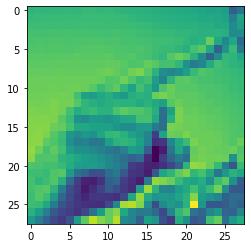

In [16]:
plt.imshow(x_train[1].reshape(28,28))

#### Data augmentation is a technique which allows us to create more samples artifically. New images are created by distorting original images slightly. For example, taking random crop of the image or rotating it or flipping it sideways.

In [17]:
dataAug = ImageDataGenerator(
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False)  # randomly flip images

dataAug.fit(x_train)

In [18]:
x_train.shape

(27455, 28, 28, 1)

### ONE-HOT ENCODING - DEPENDENT VARIABLES

In [19]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

### Encoded classes

In [20]:
label_binarizer.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [21]:
class_names = ["A","B","C","D","E","F","G","H","I","K","L",'M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [22]:
y_train.shape

(27455, 24)

### SPLITTING THE TRAIN DATA INTO TRAIN AND VALIDATION

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

### Reduce learning rate when a metric (val_accuracy) has stopped improving.

In [24]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

## Designing the model

In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", input_shape=(28,28,1), activation="relu"))
model.add(Conv2D(32, (3, 3), padding = "same", input_shape=(28,28,1), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))


model.add(Conv2D(64, (3, 3),padding = "same", activation="relu"))
model.add(Conv2D(64, (3, 3),padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3),padding = "same", activation="relu"))
model.add(Conv2D(128, (3, 3),padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(24, activation="softmax"))

## Model Summary

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        3

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [28]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_val, y_val),
    shuffle=True,
    callbacks = [lr_reduce]
)


Epoch 1/30
344/344 [==============================] - 126s 358ms/step - loss: 1.0060 - accuracy: 0.7178 - val_loss: 5.5156 - val_accuracy: 0.1268 - lr: 0.0010
Epoch 2/30
344/344 [==============================] - 162s 472ms/step - loss: 0.1159 - accuracy: 0.9626 - val_loss: 0.0081 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 3/30
344/344 [==============================] - 124s 360ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0138 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 4/30
344/344 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9903
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
344/344 [==============================] - 140s 407ms/step - loss: 0.0283 - accuracy: 0.9903 - val_loss: 0.0167 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 5/30
344/344 [==============================] - 3501s 10s/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0013 - val_accuracy: 0.9998 - lr: 5.0000e-04
Epoch 6/30
344/344 [=====================

### Evaluation on test set

In [29]:
preds = model.evaluate(x_test,y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

225/225 [==============================] - 11s 50ms/step - loss: 0.0450 - accuracy: 0.9898

Loss = 0.045014481991529465
Test Accuracy = 0.9898215532302856


## Try prediction on your own image!

1/1 [==============================] - 0s 223ms/step
Predicted letter is F


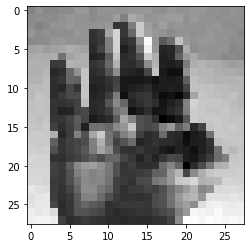

In [30]:
img_path = "C:/Users/saisr/Desktop/WIN_20230525_23_50_53_Pro.jpg"
img = image.load_img(img_path, target_size=(28, 28),  color_mode="grayscale")
imshow(img,cmap = "gray")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = x/255
x = np.vstack([x])
print("Predicted letter is "+ class_names[np.argmax(model.predict(x))])

### Checking on Test data

In [31]:
preds = model.predict(x_test)

225/225 [==============================] - 10s 44ms/step


Predicted letter is V 
Actual Answer: V


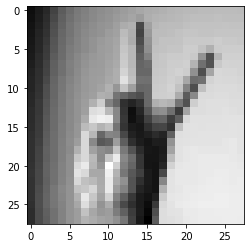

In [32]:
n=5
plt.imshow(x_test[n].reshape(28,28),cmap="gray") 
plt.grid(False) 
print("Predicted letter is",class_names[np.argmax(preds[n])],"\nActual Answer:",class_names[np.argmax(y_test[n])]) # Prediction - True Answer